In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
# import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Reshape
from keras.optimizers import Adagrad, Adam, SGD, RMSprop
# keras.utils.vis_utils.pydot = pydot

Using TensorFlow backend.


In [2]:
# Split Movielens 100K data into train and test (80-20)
np.seed = 1
dataset = pd.read_csv("../data/u.data",sep='\t',names="user_id,item_id,rating,timestamp".split(","))
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values
train, test = train_test_split(dataset, test_size=0.2)

In [3]:
dataset.head()

,user_id,item_id,rating,timestamp
0,195,241,3,881250949
1,185,301,3,891717742
2,21,376,1,878887116
3,243,50,2,880606923
4,165,345,1,886397596


## Building the model

In [4]:
# Set user and item input
user_id_input = Input(shape=[1], name='User')
item_id_input = Input(shape=[1], name='Item')

In [5]:
# Set the output embedding size and build the user and item embeddings
embedding_size = 30

user_embedding = Embedding(input_dim=dataset.user_id.unique().shape[0], output_dim=embedding_size, input_length=1, 
                          name="user_embedding")(user_id_input)
item_embedding = Embedding(input_dim=dataset.item_id.unique().shape[0], output_dim=embedding_size, input_length=1, 
                          name="item_embedding")(item_id_input)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
# Reshape both the embeddings and compute the dot product between the two
user_vecs = Reshape([embedding_size])(user_embedding)
item_vecs = Reshape([embedding_size])(item_embedding)

y = Dot(1, normalize=False)([user_vecs, item_vecs])

In [7]:
# Create and compile the model
model = Model(inputs=[user_id_input, item_id_input], outputs=y)

model.compile(loss='mean_absolute_error', optimizer='adam')

In [8]:
# Train the model with different parameters 
history = model.fit([train.user_id, train.item_id], train.rating, batch_size=64, epochs=10, shuffle=True, verbose=1)


Epoch 1/10
80000/80000 [==============================] - 3s 36us/step - loss: 2.7637
Epoch 2/10
80000/80000 [==============================] - 3s 35us/step - loss: 0.9149
Epoch 3/10
80000/80000 [==============================] - 3s 34us/step - loss: 0.7647
Epoch 4/10
80000/80000 [==============================] - 3s 34us/step - loss: 0.7338
Epoch 5/10
80000/80000 [==============================] - 3s 35us/step - loss: 0.7186
Epoch 6/10
80000/80000 [==============================] - 3s 34us/step - loss: 0.7068
Epoch 7/10
80000/80000 [==============================] - 3s 34us/step - loss: 0.6965
Epoch 8/10
80000/80000 [==============================] - 3s 34us/step - loss: 0.6871
Epoch 9/10
80000/80000 [==============================] - 3s 35us/step - loss: 0.6780
Epoch 10/10
80000/80000 [==============================] - 3s 34us/step - loss: 0.6695


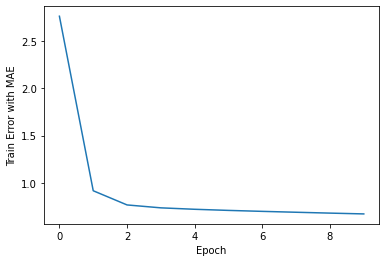

In [9]:
# Plot the MAE with respect to the epoch
pd.Series(history.history['loss']).plot()
plt.xlabel("Epoch")
plt.ylabel("Train Error with MAE")
plt.show()

In [10]:
# Predictions using the test set and computing MAE and RMSE
y_hat = np.round(model.predict([test.user_id, test.item_id]),0)
y_true = test.rating
print("MAE on test data:",mean_absolute_error(y_true, y_hat))
print("RMSE on test data:",np.sqrt(mean_squared_error(y_true, y_hat)))

MAE on test data: 0.6961
RMSE on test data: 0.9938812806366765
